Import the neccessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [36]:
print("Loading Apple Stock data")
try:
    df = pd.read_csv("apple.csv")
    print("Data loaded successfully")
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'apple.csv' was not found. Please ensure it is in the same directory as the script.")
    exit()

Loading Apple Stock data
Data loaded successfully
         date   close    open    high     low       volume
0  2024-08-05  209.27  199.09  213.50  196.00  119548600.0
1  2024-08-06  207.23  205.30  209.99  201.07   69660500.0
2  2024-08-07  209.82  206.90  213.64  206.39   63516417.0
3  2024-08-08  213.31  213.11  214.20  208.83   47161149.0
4  2024-08-09  216.24  212.10  216.78  211.97   42201646.0


Data Preprocessing and Feature Engineering

In [37]:
# Data preprocessing involves cleaning and preparing the data for the model
# We need to define our features (the columns we'll use for prediction) and our target (the column we want to predict)
# We'll drop the "date" column as it requires more advanced techniques for a simple linear regression

# Check for missing values
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicated values
df_duplicated = df.duplicated().sum()
print("Duplicated values")
print(df_duplicated)

# Drop any rows with missing values 
df.dropna(inplace=True)

# Define our features (X) and target (y)
features = ["open","high","low","volume"]
target = "close"

X = df[features]
y = df[target]

print("Shape of features (X):",X.shape)
print("Shape of target (y):",y.shape)

Missing values
date      0
close     0
open      0
high      0
low       0
volume    0
dtype: int64
Duplicated values
0
Shape of features (X): (249, 4)
Shape of target (y): (249,)


Data Splitting

In [38]:
# We split the data into training and testing sets. The model will learn from the
# training data and will be evaluated on the testing data to check its performance on unseen information

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 199 samples
Testing set size: 50 samples


Model Training

In [39]:
# We create an instance of the Linear Regression model and train it using the "fit" method.
# The model learns the best-fit line that minimizes the distance to all data points

print("Training the Linear Regression model.........")
model = LinearRegression()
model.fit(X_train,y_train)
print("Model Training complete!")

Training the Linear Regression model.........
Model Training complete!


Model Evaluation

In [40]:
# We make predictions on the test set and calculate key evaluation metrics
# Mean Squared Error (MSE) measures the average squared difference between the
# predicted and actual values.
# R-squared provides a measure of how well the model explains the variability of the target variable.
# A value close to 1 is ideal.

print("Evaluating the model......")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluating the model......
Mean Squared Error (MSE): 1.57
R-squared: 0.99


Visualization

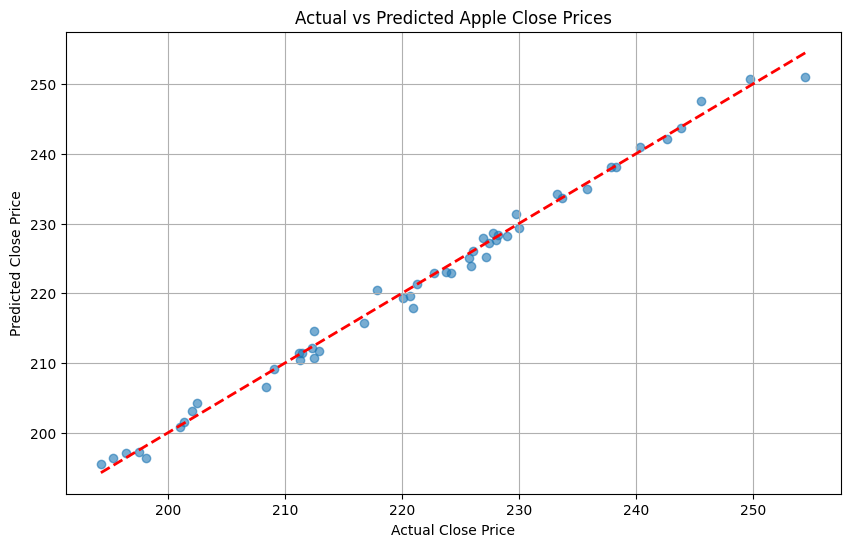

In [41]:
# A scatter plot of actual vs predicted values is a great way to visualize the model's performance
# A perfect model would have all points lying on the dashed red line

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2)
plt.title("Actual vs Predicted Apple Close Prices")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.show()

Making a New Prediction

In [42]:
# You can use trained model to predict the price for a new data point
# Note: The values here are hypothetical for demonstration
new_data = pd.DataFrame({
    "open":[150.0],
    "high":[155.0],
    "low":[148.0],
    "volume":[10000000]
})

predicted_price = model.predict(new_data)
print(f"Example Prediction for a new data point")
print(f"Features: open=150,high=155,low=148,volume=10M")
print(f"Predicted Close Price: ${predicted_price[0]:.2f}")

Example Prediction for a new data point
Features: open=150,high=155,low=148,volume=10M
Predicted Close Price: $152.60
